# INDIVIDUAL ASSIGNMENT 2

### The section on the top is from Individual Assignment 1.

## Data

This project will explore data on salaries of jobs in the Data Science domain. This dataset was obtained from Kaggle through the following link:

https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries

In [1]:
library(readr)
library(dplyr)
library(repr)
library(ggplot2)
library(gridExtra)
url<-"https://raw.githubusercontent.com/celike1/STAT301_Project/main/ds_salaries.csv"
dataset<- read.csv(url)
#here I dropped the id column which was named X
dataset<- subset(dataset, select = -X)
head(dataset,3)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


In the description of the dataset, it is mentioned that the data was  aggregated by ai-jobs.net (https://ai-jobs.net/). The specific source of the data is shown as https://salaries.ai-jobs.net/ however this link does not work at the moment.

The Kaggle dataset that will be used in this project has 607 rows and 12 columns including and id column. The other 11 columns include four quantitative, five categorical and two ordinal variables. Their detailed descriptions are shown below:

* work_year: The year the salary was paid. The range of this data is from 2020-2022. This is a quantitative explanatory variable. </br>

* experience_level: Level of experience  in the job during the year. This variable is a ordinal explanatory varibale.The possible values are: </br>
  EN = Entry-level / Junior  </br>
  MI = Mid-level / Intermediate </br>
  SE = Senior-level / Expert </br>
  EX = Executive-level / Director </br>
  
* employment_type: Type of employement. This is a categorical explanatory varibale. The possible values are: </br>
  PT = Part-time  </br>
  FT = Full-time  </br>
  CT = Contract </br>
  FL = Freelance </br>

* job_title: Position title during the year. This is a categorical explanatory variable. There 50 different values possible for every different Data Science position. The values include (Data Scientist, Machine Learning Scientist, Big Data Engineer etc.) </br>

* salary: Total gross salary amount paid. This is the quantitative **response** variable that ranges from 4000 to 30400000 </br>

* salary_currency: Currency of the salary paid represented as ISO 4217 currency code. This is a categorical explanatory variable. It has 17 different values. The values include 'EUR','USD','GBP' etc. </br>

* salary_in_usd: Salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com). This is a quantitative exploratory variable that ranges from 2859 to 600000.</br>

* employee_residence: Employee's primary country of residence in during the work year represented as ISO 3166 country code. This is a categorical explanatory varibale. It has 57 different values. The values include 'AU','BO','IE','CH' etc. </br>

* remote_ratio = Overall amount of work done remotely. This is quantitative explanatory variable. The possible values are: </br>
 0 = No remote work (less than 20%)</br>
 50 = Partially remote </br>
 100 =  Fully remote (more than 80%) </br>

* company_location = Country of the employer's main office or contracting branch as an ISO 3166 country code. This is categorical explanatory variable. It has 50 different values. The values include 'DE','JP','GB' etc. </br>

* company_size = Average number of people that worked for the company during the year. This  is a ordinal explanatory varibale. The possible values are: </br>
  S = less than 50 employees (small) </br>
  M = 50 to 250 employees (medium) </br>
  L = more than 250 employees (large) </br>

In addition, there does not seem to be any immediate missing values in the columns.

## Question

The question that we will try to answer in this project is: **How do location of a company, company size, experience level of an employee, employment type, remote working ratio and work year predict the salary of an entry level data scientist?**

This question is focused on prediction. To answer this quesiton we will be using the following variables from our dataset:

* company_location (explanatory varibale)
* company_size (explanatory varibale)
* experience_level (explanatory varibale)
* employment_type (explanatory varibale)
* remote_ratio (explanatory varibale)
* work_year (explanatory varibale)
* salary (response variable)

We will perform multiple linear regression on these variables and try to answer our question. This data is appropriate to answer this question as it includes many different companies from all sizes aroud the world with different employement styles and positions which makes it a dataset that can provide insight on how entry level data science salaries vary in the world. 

In this project only the explanatory variables that are mentioned above will be used. 

The detailed description of these variables are presented in the Data section above. Our reasoning for not including some of the variables are explained below:

- job_title variable is not included. This is because we are trying to answer a question about entry-level positions. Many job titles in our dataset do not fall under entry level jobs. Considering that the entry level jobs determine the job titles that are available, we decided to not use this variable.
- employee location is not included. We thought that this information would be useful for our purposes to asses if an employee is working remotely in a company. However, we already have a varibale called remote_ratio that gives us this information. Therefore including employee location variable would be redundant in our case.
- salary and salary_currency were also not included because we thought that having one shared salary type (salary_in_usd) would be easier for comparison purposes. Since we use a common salary in usd we do not have to do any convertions considering different currencies.

We are asking this question because we have students in our group who aspire to be data scientists. Some of us are very interested in working outside of Canada. Answering this research question will help us get informed about the countries that have companies that can provide good opportunites for entry level data science jobs and how company size is also related to salary. 

## Exploratory Data Analysis and Visualization

We start our EDA by checking if we have any missing values.

In [2]:
head(dataset,3)
#Checking to see if the dataset includes any missing values
any(is.na(dataset))

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
2,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
3,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M


[1] FALSE

The dataset does not include any missing values. However, some of the factor names in some variables are ard to understand. We will rename the different employment types, experience levels and company sizes so that our plots can have more meaningful and understandable level labels. In addition we will convert remote ratio to have "No remote work", "Partially remote" and "Fully remote" as name instead of numbers. Then we will filter our dataset to only have data for Entry-level / Junior Positions because we want to be able to create plots for various distributions for this experience level.

In [3]:
dataset <- dataset %>%
  mutate(employment_type = recode(employment_type,
    "CT" = "Contract",
    "FL" = "Freelance",
    "FT" = "Full-time",
    "PT" = "Part-time"
  ))

dataset <- dataset %>%
  mutate(experience_level = recode(experience_level,
    "EN" = "Entry-level / Junior",
    "MI" = "Mid-level / Intermediate",
    "SE" = "Senior-level / Expert",
    "EX" = "Executive-level / Director"
  ))

dataset <- dataset %>%
  mutate(company_size = recode(company_size,
    "S" = "Small",
    "M" = "Medium",
    "L" = "Large"
  ))

dataset$remote_ratio <- factor(dataset$remote_ratio, levels = c(0, 50, 100), 
                               labels = c("No remote work", "Partially remote", "Fully remote"))

#we are filtering data with Entry Level/Junior position experience level.
entry_data<- filter(dataset, experience_level == 'Entry-level / Junior')
head(entry_data,3)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<fct>,<chr>,<chr>
1,2020,Entry-level / Junior,Full-time,Data Analyst,72000,USD,72000,US,Fully remote,US,Large
2,2020,Entry-level / Junior,Full-time,Data Scientist,45000,EUR,51321,FR,No remote work,FR,Small
3,2020,Entry-level / Junior,Full-time,Data Scientist,35000,EUR,39916,FR,No remote work,FR,Medium


We are creating multiple plots here that will help us explore our dataset.

In [4]:
options(repr.plot.width = 15, repr.plot.height = 16)
library(gridExtra)

plot_all1<- ggplot(dataset, aes(x = factor(work_year), y = salary_in_usd, fill = experience_level)) +
  geom_boxplot() +
  labs(x = "Work Year", y = "Salary in USD") +
  ggtitle("Plot 1: Boxplot of Salary by Work Year for All Experience Levels ")
  
plot2<-ggplot(entry_data, aes(x = factor(work_year), y = salary_in_usd)) +
  geom_boxplot() +
  labs(x = "Work Year", y = "Salary in USD") +
  ggtitle("Plot 2: Boxplot of Salary by Work Year for Entry-level / Junior Positions ") 

plot3<-ggplot(entry_data, aes(x = factor(company_size), y = salary_in_usd, fill = company_size)) +
  geom_boxplot() +
  labs(x = "Company Size", y = "Salary in USD") +
  ggtitle("Plot 3 : Boxplot of Salary by Company Size for Entry-level / Junior Positions") 


plot_all4<- ggplot(dataset, aes(x = remote_ratio, y = salary_in_usd, fill = experience_level)) +
  geom_boxplot() +
  labs(x = "Remote Ratio", y = "Salary in USD") +
  ggtitle("Plot 4: Boxplot of Salary by Remote Ratio for All Experience Levels ") +
  theme(text = element_text(size=12))

plot5<-ggplot(entry_data, aes(x = factor(employment_type), y = salary_in_usd)) +
  geom_boxplot() +
  labs(x = "Employment Type", y = "Salary in USD") +
  ggtitle("Plot 5: Boxplot of Salary by Employment Type for Entry-level/ Junior Positions") 


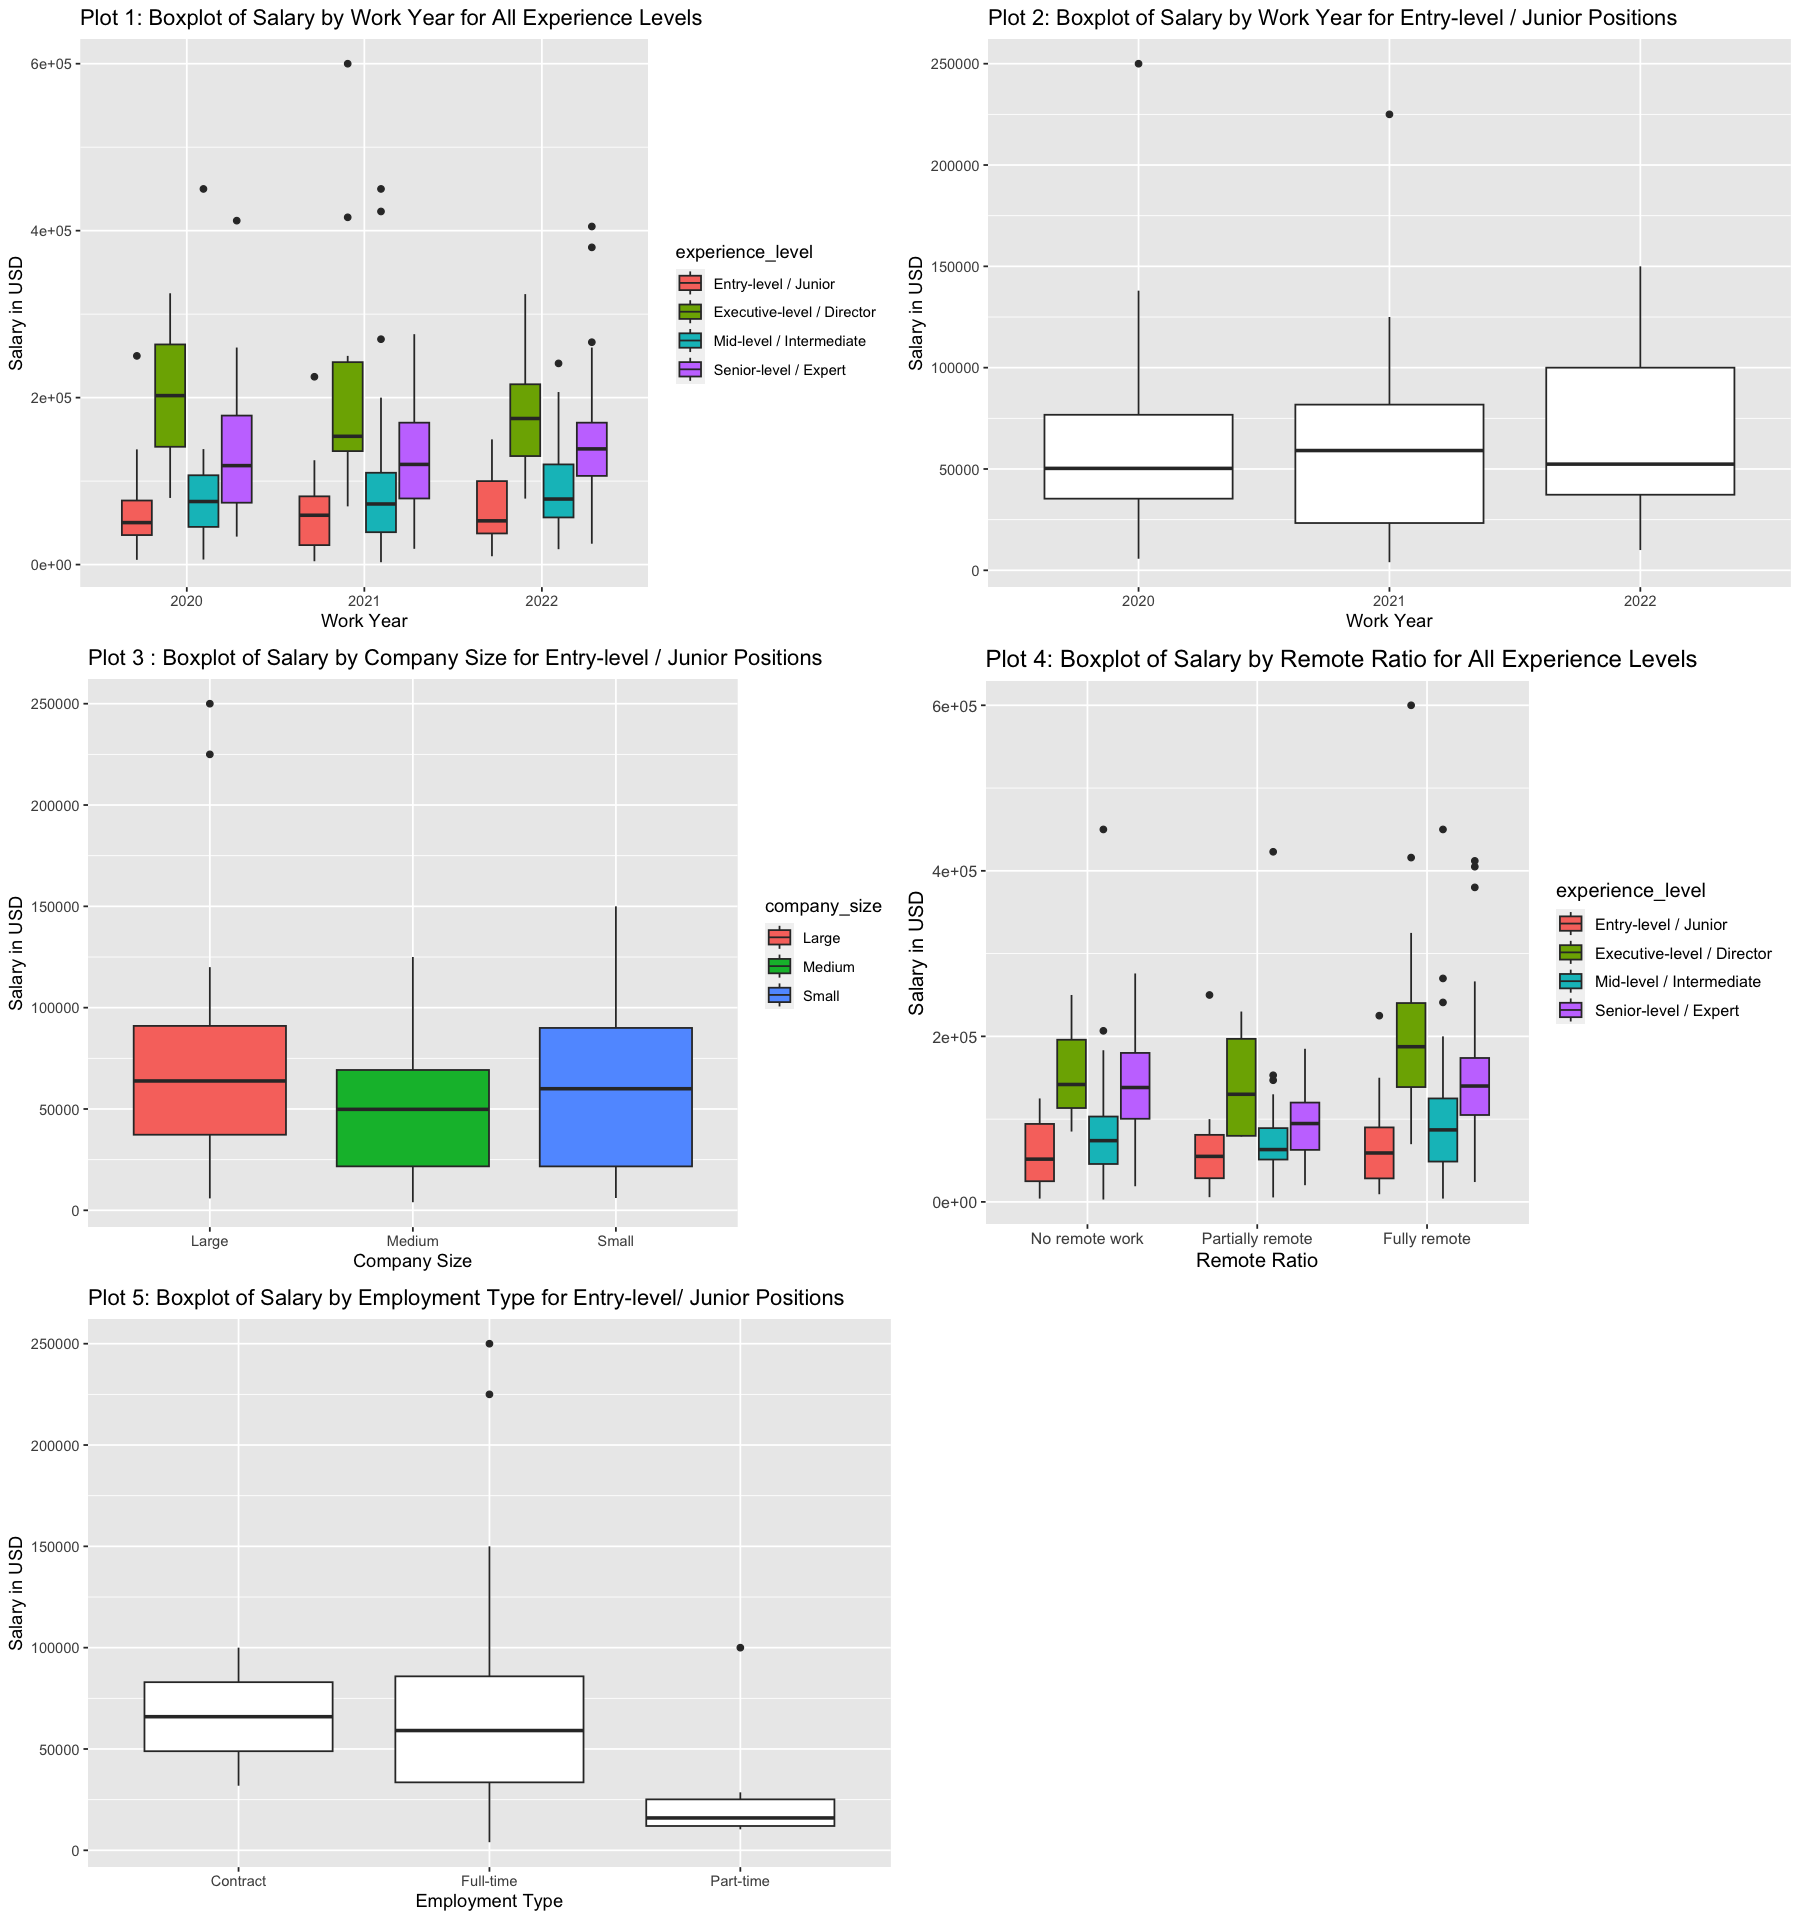

In [5]:
grid.arrange(plot_all1,plot2, plot3, plot_all4, plot5, ncol = 2)

All of these plots are relevent to address our question and explore the data because:

- Plot 1 and Plot 2 : One of the variables that we are trying to explore is work year and how the distribution of salary changes across different years. In Plot 1, we plot boxplots for last 3 years for all experience levels. This can give us an insight about whether a specific year had mostly higher or lower salaries for all levels. For example, in the case of a global economic crisis, it is likely that every experience level will receive a lower salary than other years. In Plot 2, we are specifically trying to explore how the salary for Entry-level / Junior Positions change in last 3 years. Exploring these two plots together is very important because if we only plotted Plot 2, we could be tempted to think that a certain year had a lower salary compared to others for Entry-level / Junior Positions while it is actually low for all experience levels and is not related to the experience level itself but related to some other external factor. In Plot 1 and Plot 2 we observe that in the last 3 years most experience levels received similar salaries and there has not been a significant increase or decrease.

- Plot 3: In plot 3, we are specifically trying to see which company size is giving the hughest salary for Entry-level / Junior Positions. From this plot, we can see that small and large companies have a very similar range for  Entry-level / Junior Positions. This plot is only plotted for Entry-level/ Junior position because we expected to have an increase in other expreience levels' salries as the company size got bigger.

- Plot 4: This plot communicates how salary in all experience levels changes for remote working options. Comparing it to all the experience levels, we see that Entry-level/ Junior position receives a a similar salary in every type of work environment (fully-remote, remote, half-remote). This is not the same for executive directors. There is a noticable difference in salary for fully remote and other work options.

- Plot 5: In this plot we observe that Entry-level/ Junior employees receive a similiar salary when their employement type is contract or full time. However, the amount they receive is significantly lower for part-time jobs. This plot is only plotted for  Entry-level/ Junior jobs because the concept of part-time is not existent for other experience levels.

In addition, a boxplot including company locations was not added because this dataset has 50 different country locations. I did not think that it would be appropriate to plot that variable using boxplots. Using a barplot could be more appropiate for this variable. Another groupmate I have (Eric) did data exploration though barplots. This variable can be found in his assignment.
